In [ ]:
#LSTM NONlinear
try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)



from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.11.0


In [ ]:
# make the original data

#creiamo un segnale sintetico complicato

series = np.sin((0.1*np.arange(400))**2)


This is a time series of the form:

x(t)=sin(ωt^2)

il tempo e quindi la frequenza ora cambiano quadraticamente

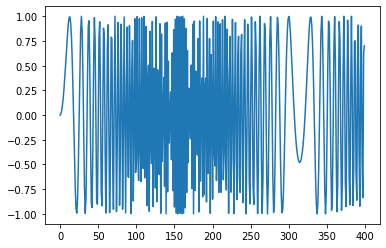

In [ ]:
# plot it
plt.plot(series)
plt.show()

In [ ]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T) # make it N x T
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (390, 10) Y.shape (390,)


In [ ]:
### try autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.01),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)


Epoch 1/80
7/7 [==============================] - 2s 81ms/step - loss: 2.1116 - val_loss: 0.7797
Epoch 2/80
7/7 [==============================] - 0s 24ms/step - loss: 2.0787 - val_loss: 0.7698
Epoch 3/80
7/7 [==============================] - 0s 18ms/step - loss: 2.0449 - val_loss: 0.7611
Epoch 4/80
7/7 [==============================] - 0s 22ms/step - loss: 2.0133 - val_loss: 0.7529
Epoch 5/80
7/7 [==============================] - 0s 28ms/step - loss: 1.9835 - val_loss: 0.7445
Epoch 6/80
7/7 [==============================] - 0s 55ms/step - loss: 1.9523 - val_loss: 0.7374
Epoch 7/80
7/7 [==============================] - 0s 30ms/step - loss: 1.9206 - val_loss: 0.7305
Epoch 8/80
7/7 [==============================] - 0s 31ms/step - loss: 1.8906 - val_loss: 0.7229
Epoch 9/80
7/7 [==============================] - 0s 31ms/step - loss: 1.8647 - val_loss: 0.7161
Epoch 10/80
7/7 [==============================] - 0s 30ms/step - loss: 1.8364 - val_loss: 0.7089
Epoch 11/80
7/7 [============

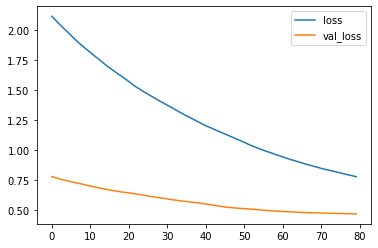

In [ ]:
# Plot loss per iteration

#le perdite sono abbastanza alte anche se sembra convergere
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

13/13 [==============================] - 0s 1ms/step
(390, 1)


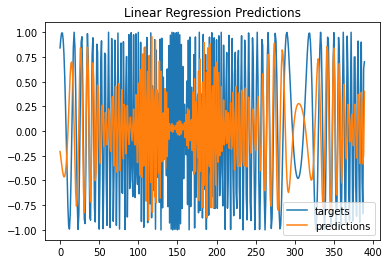

In [ ]:
# One-step forecast using true targets
# Note: even the one-step forecast fails badly
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()

#se già il single step fallisce malamente anche il multi step sarà tremendo

1/1 [==============================] - 0s 20ms/step


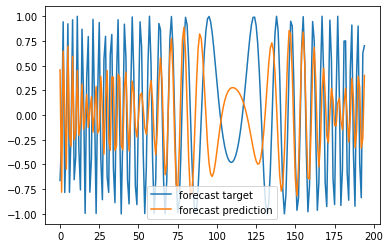

In [ ]:
# This is the code we had before - it does the same thing

# One-step forecast using true targets

#questa parte non è troppo utile

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0] # 1x1 array -> scalar
  i += 1
  
  # update the predictions list
  validation_predictions.append(p)

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

1/1 [==============================] - 0s 23ms/step


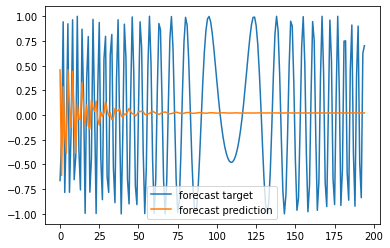

In [ ]:
# Multi-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [ ]:
### Now try RNN/LSTM model
X = X.reshape(-1, T, 1) # make it N x T x D

# make the RNN
i = Input(shape=(T, D))
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.05),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  batch_size=32,
  epochs=200,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/200
7/7 [==============================] - 3s 98ms/step - loss: 0.5647 - val_loss: 0.4903
Epoch 2/200
7/7 [==============================] - 0s 15ms/step - loss: 0.5584 - val_loss: 0.4855
Epoch 3/200
7/7 [==============================] - 0s 16ms/step - loss: 0.5525 - val_loss: 0.4824
Epoch 4/200
7/7 [==============================] - 0s 19ms/step - loss: 0.5479 - val_loss: 0.4804
Epoch 5/200
7/7 [==============================] - 0s 16ms/step - loss: 0.5434 - val_loss: 0.4783
Epoch 6/200
7/7 [==============================] - 0s 16ms/step - loss: 0.5391 - val_loss: 0.4768
Epoch 7/200
7/7 [==============================] - 0s 17ms/step - loss: 0.5356 - val_loss: 0.4755
Epoch 8/200
7/7 [==============================] - 0s 16ms/step - loss: 0.5315 - val_loss: 0.4760
Epoch 9/200
7/7 [==============================] - 0s 15ms/step - loss: 0.5284 - val_loss: 0.4763
Epoch 10/200
7/7 [==============================] - 0s 24ms/step - loss: 0.5254 - val_loss: 0.4762
Epoch 11/200
7/7 [=

Ora la loss è molto meglio del linear model, quindi per time series semplici il modello lineare va bene, tipo il seno, ma se il segnale è complesso la RNN è molto + flessibile

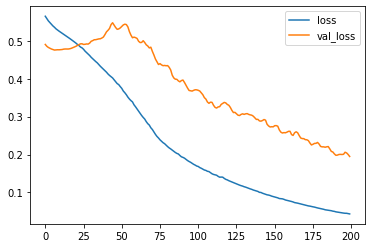

In [ ]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

13/13 [==============================] - 0s 2ms/step
(390, 1)


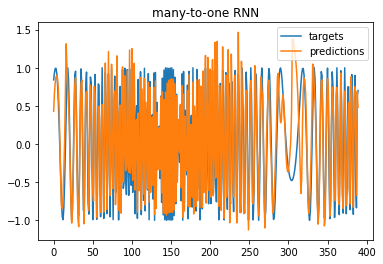

In [ ]:
# One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("many-to-one RNN")
plt.legend()
plt.show()

1/1 [==============================] - 0s 31ms/step


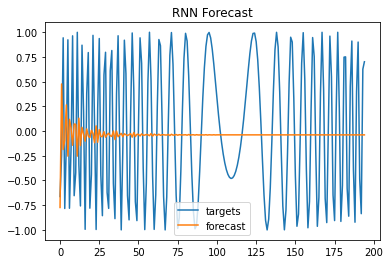

In [ ]:


# Multi-step forecast
forecast = []
input_ = X[-N//2]
while len(forecast) < len(Y[-N//2:]):
  # Reshape the input_ to N x T x D
  f = model.predict(input_.reshape(1, T, 1))[0,0]
  forecast.append(f)

  # make a new input with the latest forecast
  input_ = np.roll(input_, -1)
  input_[-1] = f

plt.plot(Y[-N//2:], label='targets')
plt.plot(forecast, label='forecast')
plt.title("RNN Forecast")
plt.legend()
plt.show()



Qua non va molto bene, il risultato non cambia molto se avremmo usato una simple RNN, non è che gli LST sono magici semplicmente un po' più efficienti delle simple RNN, in genere sono migliori per trovare long term dependencies, ma fino a un certo punto.
Inoltre, in alcuni problemi come questo, non è molto di aiuto ricordare valori molto antecedenti.